In [1]:
# from pythainlp import word_tokenize
# from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# from pythainlp.word_vector import thai2vec 
import numpy as np
import pandas as pd
%reload_ext autoreload
%autoreload 2
# %matplotlib inline

from pythainlp.tokenize import word_tokenize,sent_tokenize
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy.cluster import hierarchy
import dill as pickle
import pandas as pd
import pythainlp.word_vector
# model = word_vector.get_model()
model_path = 'thwiki_data/models/'

In [2]:
df = pd.read_csv("dataRe.csv")

In [3]:
df

,Vehicle,restaurant,food delivery,Problem,work,เวลาในการรออาหาร,ราคาอาหาร
0,เดิน,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวมันไก่, ข้าวราดแ...",Promotions,ยิ่งเยอะยิ่งไม่อยากไปต่อ,1 - 2 ชั่วโมง,10 นาทีขึ้นไป,51-100บาท
1,รถยนต์ส่วนตัว,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวมันไก่, ข้าวราดแ...",หิว ขี้เกียจเดิน จะทำงาน,กลัววัตถุดิบหมด,2 - 3 ชั่วโมง,6 - 10 นาที,51-100บาท
2,เดิน,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวราดแกง, ร้านน้ำ,...",เพราะร้านที่อยากกินอยู่ไกล บางทีก็อยู่ในเวลาเร...,ถ้าคิวยาวก็ไม่ซื้อ,1 - 2 ชั่วโมง,6 - 10 นาที,100-200 บาท
3,เดินดิ,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวราดแกง, ร้านน้ำ,...",ขี้เกียจเดินออกไปกินข้างนอก,ถ้าคนเยอะก็จะไปเลือกร้านอื่น,1 - 2 ชั่วโมง,6 - 10 นาที,300-500 บาท
4,รถประจำทาง,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวมันไก่, ข้าวราดแ...",อยากกินร้านนั้น,ผล ถ้าแถวยาวมากก็จะขี้เกียจรอ,1 - 2 ชั่วโมง,10 นาทีขึ้นไป,100-200 บาท
...,...,...,...,...,...,...,...
57,เดิน,NaN,NaN,NaN,NaN,NaN,NaN
58,รถจักรยานยนต์,NaN,NaN,NaN,NaN,NaN,NaN
59,เดิน,NaN,NaN,NaN,NaN,NaN,NaN
60,รถจักรยานยนต์,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df['Problem']

0          ยิ่งเยอะยิ่งไม่อยากไปต่อ
1                   กลัววัตถุดิบหมด
2                ถ้าคิวยาวก็ไม่ซื้อ
3      ถ้าคนเยอะก็จะไปเลือกร้านอื่น
4     ผล ถ้าแถวยาวมากก็จะขี้เกียจรอ
                  ...              
57                              NaN
58                              NaN
59                              NaN
60                              NaN
61                              NaN
Name: Problem, Length: 62, dtype: object

In [27]:
# .replace('มี',np.nan).dropna().values
text = df['Problem'].dropna()
text

0                              ยิ่งเยอะยิ่งไม่อยากไปต่อ
1                                       กลัววัตถุดิบหมด
2                                    ถ้าคิวยาวก็ไม่ซื้อ
3                          ถ้าคนเยอะก็จะไปเลือกร้านอื่น
4                         ผล ถ้าแถวยาวมากก็จะขี้เกียจรอ
5                   ถ้าคนเยอะมากก็เปลี่ยนร้าน ไม่อยากรอ
6     ถ้าคนเยอะเกินไปก็จะไม่ซื้อ เปลี่ยนร้านหรือไม่ก...
7                                                แน่นอน
8     ค่ะ เพราะ ขี้เกียจรอนานๆ แล้วรู้สึกว่ามันเสียเวลา
9                       ถ้าคิวยาวเกินจะเลือกร้านอื่นแทน
12                                   ถ้าคิวยาวก็ไม่ซื้อ
13                                           ไม่กินข้าว
14                                 ขับรถออกไปกินข้างนอก
15                      ถ้าคิวยาวเกินจะเลือกร้านอื่นแทน
16                                      กลัววัตถุดิบหมด
17                                      กินอาหารน้อยลง 
18                  บ่นลงทวิตเตอร์ แล้วก็นั่งกินข้าวต่อ
19                                      กินอาหาร

In [65]:
sentences = []
for x in text:
    proc = word_tokenize(x, engine='newmm')
#     print(proc[0] == " ")
    lst = []
    for word in proc:
        if(word != " "):
            lst.append(word)
    sentences.append(lst)
sentences

[['ยิ่ง', 'เยอะ', 'ยิ่ง', 'ไม่', 'อยาก', 'ไป', 'ต่อ'],
 ['กลัว', 'วัตถุดิบ', 'หมด'],
 ['ถ้า', 'คิว', 'ยาว', 'ก็', 'ไม่', 'ซื้อ'],
 ['ถ้า', 'คน', 'เยอะ', 'ก็', 'จะ', 'ไป', 'เลือก', 'ร้าน', 'อื่น'],
 ['ผล', 'ถ้า', 'แถว', 'ยาว', 'มาก', 'ก็', 'จะ', 'ขี้เกียจ', 'รอ'],
 ['ถ้า', 'คน', 'เยอะ', 'มาก', 'ก็', 'เปลี่ยน', 'ร้าน', 'ไม่', 'อยาก', 'รอ'],
 ['ถ้า',
  'คน',
  'เยอะ',
  'เกินไป',
  'ก็',
  'จะ',
  'ไม่',
  'ซื้อ',
  'เปลี่ยน',
  'ร้าน',
  'หรือไม่',
  'กิน',
  'เลย'],
 ['แน่นอน'],
 ['ค่ะ',
  'เพราะ',
  'ขี้เกียจ',
  'รอ',
  'นานๆ',
  'แล้ว',
  'รู้สึก',
  'ว่า',
  'มัน',
  'เสียเวลา'],
 ['ถ้า', 'คิว', 'ยาว', 'เกิน', 'จะ', 'เลือก', 'ร้าน', 'อื่น', 'แทน'],
 ['ถ้า', 'คิว', 'ยาว', 'ก็', 'ไม่', 'ซื้อ'],
 ['ไม่', 'กินข้าว'],
 ['ขับรถ', 'ออก', 'ไป', 'กิน', 'ข้างนอก'],
 ['ถ้า', 'คิว', 'ยาว', 'เกิน', 'จะ', 'เลือก', 'ร้าน', 'อื่น', 'แทน'],
 ['กลัว', 'วัตถุดิบ', 'หมด'],
 ['กิน', 'อาหาร', 'น้อยลง'],
 ['บ่น', 'ลง', 'ทวิตเตอร์', 'แล้วก็', 'นั่ง', 'กินข้าว', 'ต่อ'],
 ['กิน', 'อาหาร', 'น้อยลง'],
 ['ไป', 

In [66]:
model = pythainlp.word_vector.get_model()

In [67]:
def sentence_vectorizer(ss,dim=300,use_mean=True): # ประกาศฟังก์ชัน sentence_vectorizer
    s = word_tokenize(ss)
    vec = np.zeros((1,dim))
    for word in s:
        if word in model.wv.index2word: 
            vec+= model.wv.word_vec(word)
        else: pass
    if use_mean: vec /= len(s)
    return vec

l = []
c = 0
for i in text:
    l.append(sentence_vectorizer(i)[0])
#     if(c==0):
#         print(sentence_vectorizer(i)[0])
#     c+=1
X=np.array(l)
print(X)

[[-0.13257337 -0.10003663  0.22001212 ...  0.03687051 -0.08657537
  -0.5159585 ]
 [ 0.032833   -0.07410467  0.14685299 ...  0.09231667  0.04948
  -0.056955  ]
 [-0.02242983 -0.08485817  0.07547517 ...  0.18557817 -0.09975701
  -0.37882982]
 ...
 [ 0.18902167  0.143431    0.13327533 ...  0.45422233  0.00792366
  -0.19512   ]
 [-0.06044347 -0.0576194   0.11016877 ...  0.1539754  -0.14308493
  -0.05068883]
 [ 0.00096183 -0.07280583 -0.00330916 ...  0.01236083 -0.15324133
   0.065322  ]]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


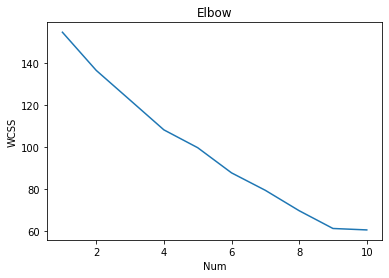

In [68]:
import matplotlib.pyplot as plt
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow')
plt.xlabel('Num')
plt.ylabel('WCSS')
plt.show()

In [69]:
n_clusters = 5
clf = KMeans(n_clusters=n_clusters,
            max_iter=100,
            init='k-means++',
            n_init=1)
labels = clf.fit_predict(X)
print(labels)
for index, sentence in enumerate(sentences):
    print(str(labels[index]) + ":" + str(sentence))

[1 2 1 1 1 1 1 4 1 1 1 1 3 1 2 2 1 2 3 3 2 1 2 3 1 0 1 0 1 0 0 0 1 1 1 1]
1:['ยิ่ง', 'เยอะ', 'ยิ่ง', 'ไม่', 'อยาก', 'ไป', 'ต่อ']
2:['กลัว', 'วัตถุดิบ', 'หมด']
1:['ถ้า', 'คิว', 'ยาว', 'ก็', 'ไม่', 'ซื้อ']
1:['ถ้า', 'คน', 'เยอะ', 'ก็', 'จะ', 'ไป', 'เลือก', 'ร้าน', 'อื่น']
1:['ผล', 'ถ้า', 'แถว', 'ยาว', 'มาก', 'ก็', 'จะ', 'ขี้เกียจ', 'รอ']
1:['ถ้า', 'คน', 'เยอะ', 'มาก', 'ก็', 'เปลี่ยน', 'ร้าน', 'ไม่', 'อยาก', 'รอ']
1:['ถ้า', 'คน', 'เยอะ', 'เกินไป', 'ก็', 'จะ', 'ไม่', 'ซื้อ', 'เปลี่ยน', 'ร้าน', 'หรือไม่', 'กิน', 'เลย']
4:['แน่นอน']
1:['ค่ะ', 'เพราะ', 'ขี้เกียจ', 'รอ', 'นานๆ', 'แล้ว', 'รู้สึก', 'ว่า', 'มัน', 'เสียเวลา']
1:['ถ้า', 'คิว', 'ยาว', 'เกิน', 'จะ', 'เลือก', 'ร้าน', 'อื่น', 'แทน']
1:['ถ้า', 'คิว', 'ยาว', 'ก็', 'ไม่', 'ซื้อ']
1:['ไม่', 'กินข้าว']
3:['ขับรถ', 'ออก', 'ไป', 'กิน', 'ข้างนอก']
1:['ถ้า', 'คิว', 'ยาว', 'เกิน', 'จะ', 'เลือก', 'ร้าน', 'อื่น', 'แทน']
2:['กลัว', 'วัตถุดิบ', 'หมด']
2:['กิน', 'อาหาร', 'น้อยลง']
1:['บ่น', 'ลง', 'ทวิตเตอร์', 'แล้วก็', 'นั่ง', 'กินข้าว', 'ต่อ']
2:['ก

In [70]:
labels

array([1, 2, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 3, 1, 2, 2, 1, 2, 3, 3, 2, 1,
       2, 3, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1], dtype=int32)

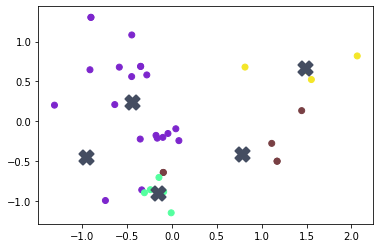

In [71]:
pca  = PCA(n_components=2).fit(X)
coords = pca.transform(X)
label_colors = ["#54FF9F", "#7D26CD", "#794044", "#F4E628","#54a1ff","#22d6c4","#22d6c4","#d65522","#cf1351"]
colors = [label_colors[i] for i in labels]
plt.scatter(coords[:, 0], coords[:, 1], c=colors)
centroids = clf.cluster_centers_
centroid_coords = pca.transform(centroids)
plt.scatter(centroid_coords[:, 0], centroid_coords[:, 1], marker='X', s=200, linewidths=2, c='#444d61')
plt.show()

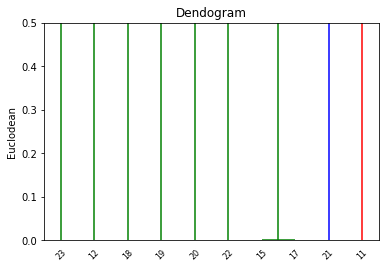

In [72]:
Z = hierarchy.linkage(X, 'ward')
dn = hierarchy.dendrogram(Z)
plt.title('Dendogram')
plt.ylabel('Euclodean')
plt.xlim(0,100)
plt.ylim(0,0.5)
plt.show()

In [85]:
hc = AgglomerativeClustering(n_clusters=5,
                             affinity='euclidean',
                            linkage='ward')
y_hc= hc.fit_predict(X)
print(y_hc)
for index, sentence in enumerate(sentences):
    print(str(y_hc[index]) + ":" + str(sentence))

[0 0 3 3 3 3 3 4 0 3 3 3 1 3 0 1 0 1 1 1 1 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0]


AttributeError: 'numpy.ndarray' object has no attribute 'labels_'

AttributeError: 'AgglomerativeClustering' object has no attribute 'predict'

In [74]:
l = []
c = 0
# for i in text:
l.append(sentence_vectorizer("คิวเยอะ รอไม่ไหว")[0])
#     if(c==0):
#         print(sentence_vectorizer(i)[0])
#     c+=1
KL=np.array(l)
clf.predict(KL)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


array([1], dtype=int32)

In [75]:
def sentence_similarity(s1,s2):
    return cosine_similarity(sentence_vectorizer(str(s1)),sentence_vectorizer(str(s2)))
sentence_similarity("รอคิวนาน", "ควัน")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


array([[0.03353456]])